In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [12]:
data = pd.read_csv('canada_per_capita_income.csv')

In [57]:
data.tail()

,year,per capita income (US$)
42,2012,42665.25597
43,2013,42676.46837
44,2014,41039.89360
45,2015,35175.18898
46,2016,34229.19363


In [49]:
rg = linear_model.LinearRegression()

In [60]:
rg.fit(data[['year']], data['per capita income (US$)'])

LinearRegression()

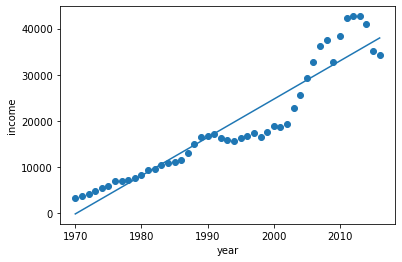

In [74]:
%matplotlib inline
plt.xlabel('year')
plt.ylabel('income')
plt.scatter(data['year'], data['per capita income (US$)'])
plt.plot(data.year, rg.predict(data[['year']]))

In [76]:
rg.predict([[2020]])

/Users/naveenkishorek/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([41288.69409442])

### Second exercise using multiple independant variables (multiple features)

In [1]:
from word2number import w2n

ModuleNotFoundError: No module named 'word2number'

In [4]:
!pip install word2number


DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621


In [10]:
df = pd.read_csv('hiring.csv')

In [11]:
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [12]:
df['experience'] = df['experience'].fillna('zero')

In [13]:
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [14]:
median_value = df['test_score(out of 10)'].median()

In [15]:
median_value

8.0

In [16]:
df['test_score(out of 10)'] = df['test_score(out of 10)'].fillna(median_value)

In [17]:
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,8.0,7,72000
7,eleven,7.0,8,80000


In [21]:
word_to_number = {
    'zero': 0,
    'one': 1,
    'two': 2,
    'three': 3,
    'four': 4,
    'five': 5,
    'six': 6,
    'seven': 7,
    'eight': 8,
    'nine': 9,
    'ten': 10,
    'eleven': 11,
    # Add more words and their corresponding numbers as needed
}

In [22]:
df['experience'] = df['experience'].map(word_to_number)

In [23]:
X = df[['experience', 'test_score(out of 10)', 'interview_score(out of 10)']]
y = df['salary($)']

In [25]:
reg = linear_model.LinearRegression()

In [26]:
reg.fit(X, y)

LinearRegression()

In [27]:
reg.predict([[2, 9, 6]])

/Users/naveenkishorek/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([53205.96797671])

In [28]:
reg.predict([[12, 10, 10]])

/Users/naveenkishorek/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([92002.18340611])

In [30]:
import pickle

In [32]:
# save the model to file
with open('linearRegressionSave', 'wb') as f:
    pickle.dump(reg, f)

In [33]:
with open('linearRegressionSave', 'rb') as f:
    newModel = pickle.load(f)

In [34]:
newModel.predict([[2, 9, 6]])

/Users/naveenkishorek/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([53205.96797671])

In [38]:
import joblib

In [39]:
joblib.dump(reg, 'regression_dump_joblib')

['regression_dump_joblib']

In [40]:
lib = joblib.load('regression_dump_joblib')

In [41]:
lib.predict([[2, 9, 6]])

/Users/naveenkishorek/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([53205.96797671])